In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score as ss
from sklearn.manifold import TSNE

In [86]:
df = pd.read_csv('Facebook_metrics_Clustering.csv')

In [87]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,Photo,2,12,4,3,0.0,100,1.633028,1.047293,1.056689,0.848498
1,Status,2,12,3,10,0.0,164,1.070536,1.037408,1.070180,0.920614
2,Photo,3,12,3,3,0.0,80,1.566372,1.033991,1.054634,0.773190
3,Photo,2,12,2,10,1.0,1777,2.798734,1.013536,1.066171,0.591867
4,Photo,2,12,2,3,0.0,393,1.636585,1.056605,1.080533,0.902048
...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,84,1.035311,0.958922,0.975163,1.256401
492,Photo,2,1,5,8,0.0,75,1.057087,1.026021,1.058694,1.188572
493,Photo,1,1,5,2,0.0,115,1.092657,1.068155,1.093855,1.160047
494,Photo,3,1,4,11,0.0,136,1.090592,1.036744,1.047004,1.178239


In [88]:
df.corr(numeric_only=True)

,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
category,1.000000,-0.136785,-0.047439,-0.108710,-0.020422,0.129338,0.240760,-0.101223,-0.162692,-0.248906
post_month,-0.136785,1.000000,0.023594,-0.176014,-0.017820,0.021145,0.398458,0.093104,0.073101,-0.382666
post_weekday,-0.047439,0.023594,1.000000,0.046693,-0.003883,-0.082653,-0.075992,-0.005795,-0.024623,0.005006
post_hour,-0.108710,-0.176014,0.046693,1.000000,-0.069849,-0.028847,-0.134386,0.008162,0.024124,0.182699
paid,-0.020422,-0.017820,-0.003883,-0.069849,1.000000,0.104414,0.066793,-0.002231,0.036644,0.048340
total_interactions,0.129338,0.021145,-0.082653,-0.028847,0.104414,1.000000,0.498460,0.080253,0.129706,-0.087395
post_ratio_engaged_consumers,0.240760,0.398458,-0.075992,-0.134386,0.066793,0.498460,1.000000,0.026890,0.038035,-0.389070
post_ratio_imp_reach_log,-0.101223,0.093104,-0.005795,0.008162,-0.002231,0.080253,0.026890,1.000000,0.940571,0.010886
post_ratio_imp_reach_like_log,-0.162692,0.073101,-0.024623,0.024124,0.036644,0.129706,0.038035,0.940571,1.000000,0.009092
post_ratio_engaged_consumption_log,-0.248906,-0.382666,0.005006,0.182699,0.048340,-0.087395,-0.389070,0.010886,0.009092,1.000000


In [89]:
s = StandardScaler()
X = df[['total_interactions','post_ratio_engaged_consumers','post_ratio_imp_reach_log','post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']]
X_scaled =  s.fit_transform(X)

#### Explain DBSCAN
1. DBSCAN define some COre and Non-core points
2. Each core point will have some kind of radius and minimum number of Sample
3. To Assign a Cluster you have to Use the Core points
4. So basically core points can extends the cluster while non-core points can't they just can be assigned and thats it
5. If a Point has been Assigned it can't be re assigned to another Cluster

##### Explain Parameter OF DBSCAN
- eps:> Can be referd to as radius of Circle that is used for core points
- min_smaples:> minimum number of samples to make this point as a core point
- metric:> distance that will be used to measure if points are in EPS or Radius

In [90]:
dbscan_model = DBSCAN().fit(X_scaled)
dbscan_model

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [91]:
df['cluster'] = dbscan_model.labels_

In [92]:
X_scaled[:10,1]

array([ 1.95210505, -0.51495845,  1.65975522,  7.06484741,  1.96770961,
       -0.34199519,  2.75064277,  4.94169643, -0.44090735,  1.50047016])

In [93]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log,cluster
0,Photo,2,12,4,3,0.0,100,1.633028,1.047293,1.056689,0.848498,0
1,Status,2,12,3,10,0.0,164,1.070536,1.037408,1.070180,0.920614,0
2,Photo,3,12,3,3,0.0,80,1.566372,1.033991,1.054634,0.773190,0
3,Photo,2,12,2,10,1.0,1777,2.798734,1.013536,1.066171,0.591867,-1
4,Photo,2,12,2,3,0.0,393,1.636585,1.056605,1.080533,0.902048,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,84,1.035311,0.958922,0.975163,1.256401,0
492,Photo,2,1,5,8,0.0,75,1.057087,1.026021,1.058694,1.188572,0
493,Photo,1,1,5,2,0.0,115,1.092657,1.068155,1.093855,1.160047,0
494,Photo,3,1,4,11,0.0,136,1.090592,1.036744,1.047004,1.178239,0


In [94]:
df['cluster'].value_counts()

cluster
 0    357
-1    126
 1      7
 2      6
Name: count, dtype: int64

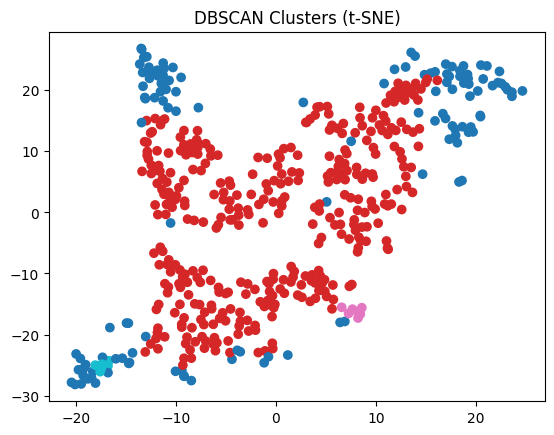

In [95]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=dbscan_model.labels_, cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()


In [96]:
X_tsne[:,1]

array([ 2.12782135e+01,  8.02478886e+00,  2.11160889e+01,  2.30840931e+01,
        2.13053761e+01,  1.23251162e+01,  2.32101040e+01,  2.41157990e+01,
        9.80342674e+00,  2.03078442e+01,  1.10836353e+01,  2.25424042e+01,
        2.27950745e+01,  2.38711128e+01,  2.39814205e+01,  9.71041870e+00,
        1.54938154e+01,  2.55970116e+01,  2.11322174e+01,  1.79140720e+01,
        1.81135826e+01,  3.75508404e+00,  1.15770855e+01,  1.95239773e+01,
        6.84913206e+00,  7.01844692e+00,  1.72521234e+00,  2.30085678e+01,
        2.11712532e+01, -2.03230228e+01,  1.47377405e+01,  3.56234598e+00,
        2.02159615e+01,  1.83960018e+01,  8.87642574e+00,  1.84071445e+01,
        1.92062454e+01, -2.40457268e+01,  1.03817663e+01,  5.11773014e+00,
        9.37211227e+00,  1.63197327e+01, -2.42780704e+01,  7.35435009e+00,
        8.99566936e+00,  1.16458988e+01,  9.26244068e+00,  8.95149422e+00,
        1.04383049e+01,  1.14768543e+01,  2.18083744e+01,  1.61633034e+01,
        2.39826393e+01,  

In [97]:
df.groupby('cluster')[[
    'total_interactions',
    'post_ratio_engaged_consumers',
    'post_ratio_imp_reach_log',
    'post_ratio_imp_reach_like_log',
    'post_ratio_engaged_consumption_log'
]].mean()


,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
cluster,,,,,
-1,456.206349,1.354227,1.115556,1.161344,1.245323
0,131.204482,1.134606,1.014592,1.035843,1.040355
1,65.428571,1.063523,0.821737,0.891023,1.022022
2,29.500000,1.015055,1.048867,1.038481,2.139567


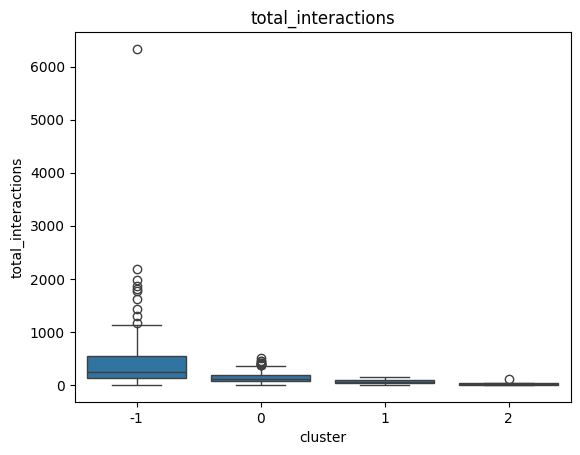

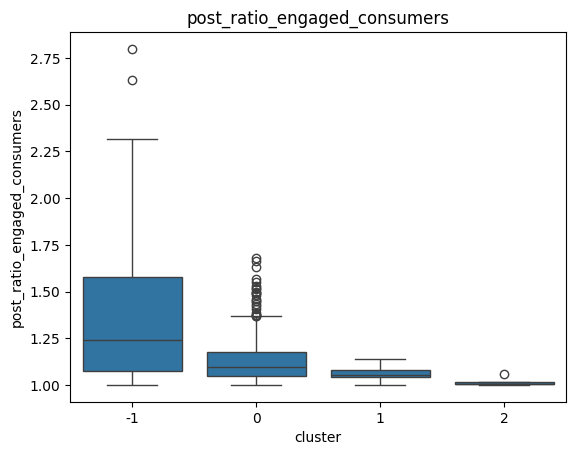

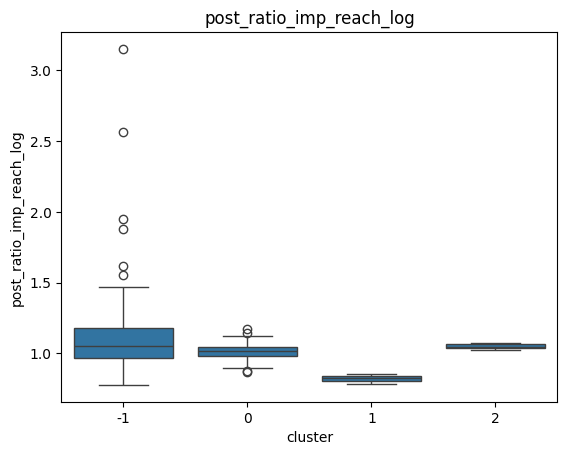

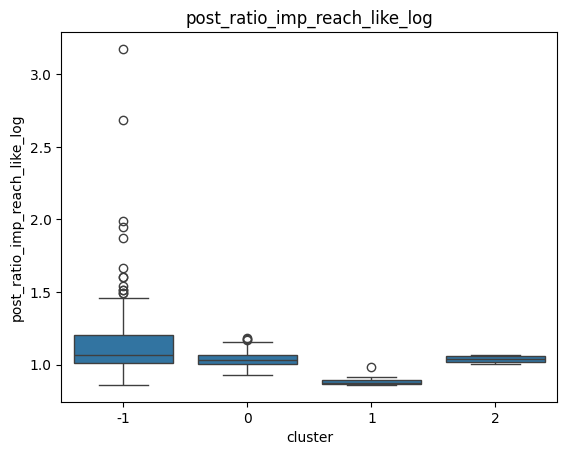

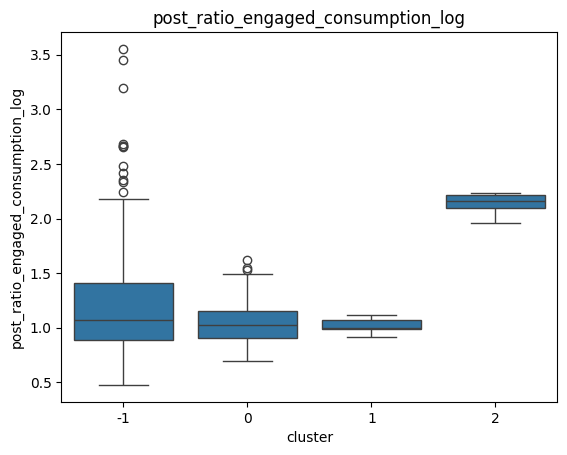

In [98]:
for col in ['total_interactions', 'post_ratio_engaged_consumers', 'post_ratio_imp_reach_log',
            'post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']:
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


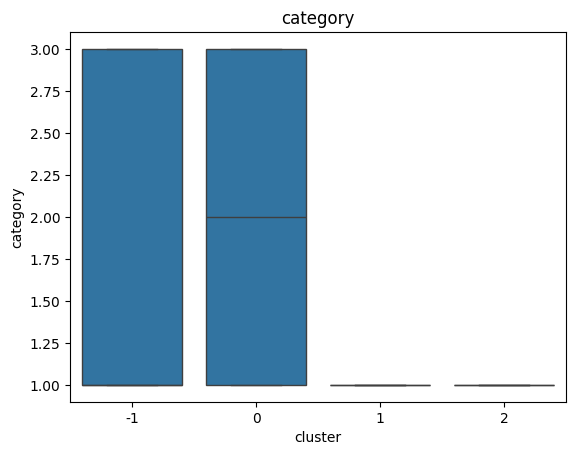

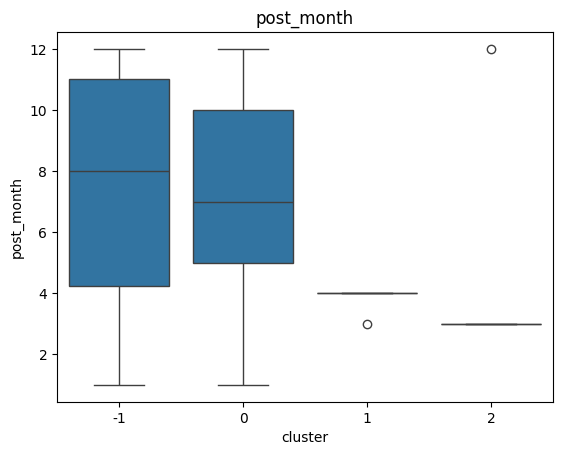

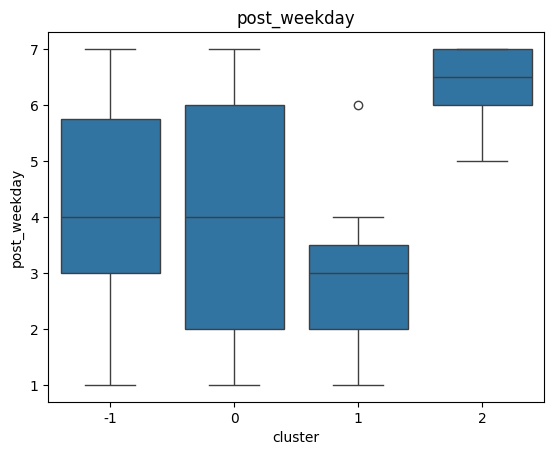

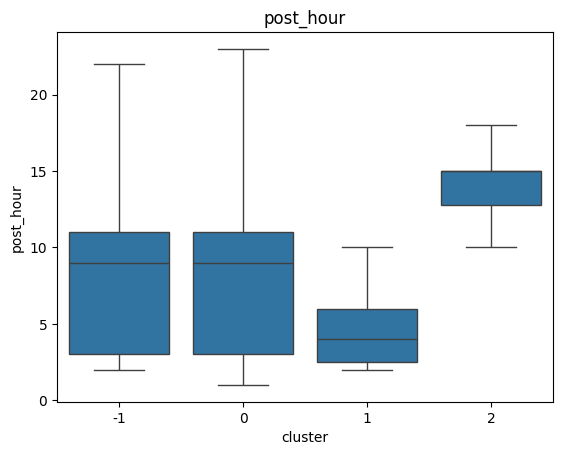

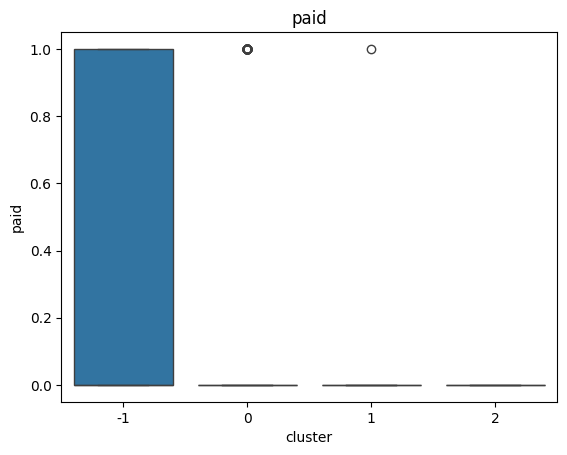

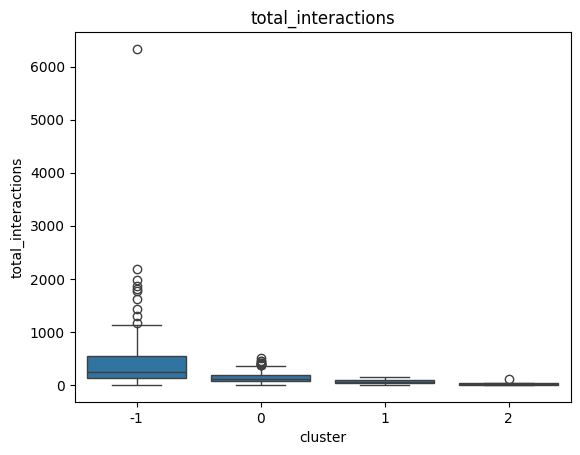

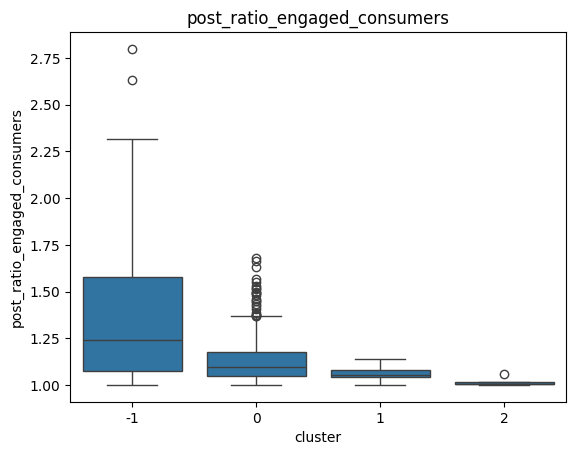

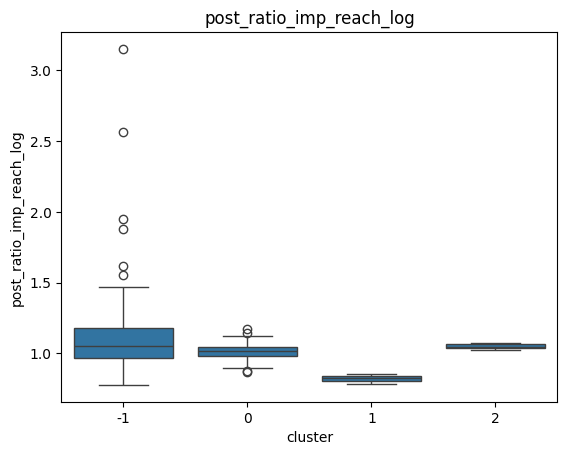

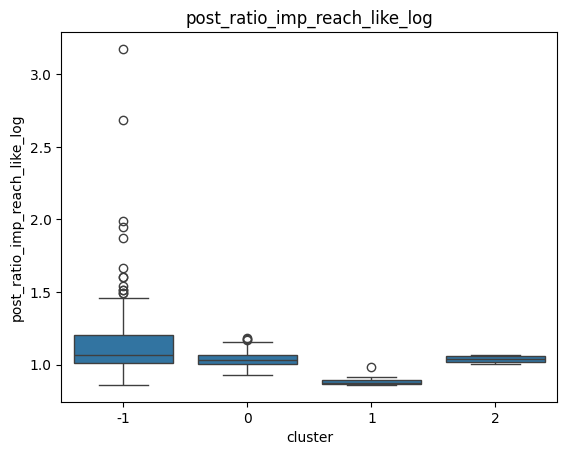

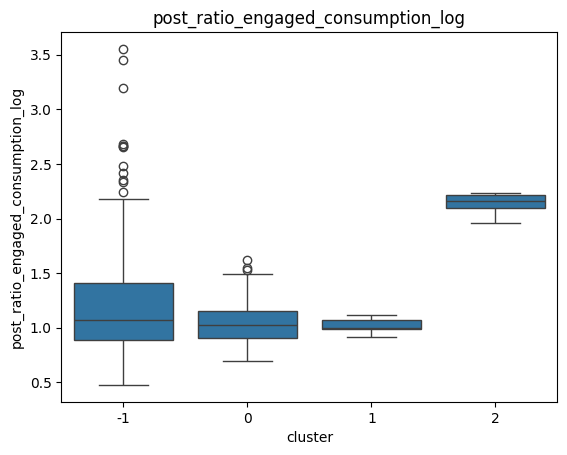

In [99]:
for col in df.columns[1:-1]:  # all scaled features
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


In [100]:
ss(X_scaled,df['cluster'])

0.16584651606465814

#### HyperParameter Tuning Using GridSearchCV
- GridSearchCV is A technique to use all possible combination between Parameters
- At the End you will Have the Best Score parameter that fits your Algorithm

In [101]:
epsilons = np.arange(0.2,0.8,0.05)
min_samples = [3,5,7,10]

In [102]:
import itertools
combinations = list(itertools.product(epsilons,min_samples))
N = len(combinations)

In [103]:
def get_scores_and_labels(combinations,X):
    scores = [] # will store all score of each combination
    all_label_list = [] # will store each label for each combination
    for i, (eps,num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps,min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_cluster = len(labels_set)
        if -1 in labels_set:
            num_cluster -= 1
        if (num_cluster < 2) or (num_cluster > 50):
            scores.append(-10)
            all_label_list.append('bad')
            c = (eps,num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_cluster} Clusters Moving on")
            continue
        scores.append(ss(X,labels))
        all_label_list.append(labels)
        print(f"Index {i} Score {scores[-1]} Labels:{all_label_list[-1]} has {num_cluster} Clusters")
        best_index = np.argmax(scores)
        best_parameters = combinations[best_index]
        best_labels = all_label_list[best_index]
        best_score = scores[best_index]
    return{
            'best_epsilon':best_parameters[0],
            'best_min_sample':best_parameters[1],
            'best_labels':best_labels,
            'best_score':best_score
        }




In [104]:
best_dict = get_scores_and_labels(combinations,X_scaled)

Index 0 Score -0.3492994300646777 Labels:[-1  1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
  1  1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1  0 -1 -1  0  0 -1  0  0  3
  0  4  0  0  0  0 -1  0  0  3  0 -1  0  3 -1 -1 -1 -1 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1  4  5 -1  6 -1 -1 -1  2 -1 -1 -1 -1 -1  6 -1  4  2  2 -1 -1
 -1  2 -1  2  4 -1  6  4 -1 -1 -1 -1  4 -1 -1 -1  2  2  6  7 -1  2  2 -1
  7  7 -1 -1  2  2  2 -1  2 -1  0 -1  2  2 -1 -1  2  2 -1 -1  2 -1 -1 -1
  2 -1 -1 -1  2 -1  0 -1  2 -1 -1 -1 -1  7  2  2 -1  2 -1 -1 -1  2  2 -1
 -1  2 -1 -1 -1 -1  2  2  2  2  2 -1 -1 -1 -1  2 -1 -1  2 -1  2 -1  2  2
 -1  2 -1 -1 -1  2 -1 -1 -1  2  9  2 -1 -1 -1 -1 12  2  2  8  2  9 -1 -1
 -1 -1 -1  2  9  2  2 -1  2  2  2  9 10  2 -1 -1 -1  2  2  2 -1  2 -1  2
  2  2 -1 

In [70]:
best_dict

{'best_epsilon': np.float64(0.7),
 'best_min_sample': 7,
 'best_labels': array([ 0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,
         0,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0, -1,
         0, -1, -1,  1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
         0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,
         0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
         0,  0, 

In [105]:
df['cluster_2'] = best_dict['best_labels']

In [106]:
df['cluster_2'].value_counts()

cluster_2
 0    402
-1     87
 1      7
Name: count, dtype: int64

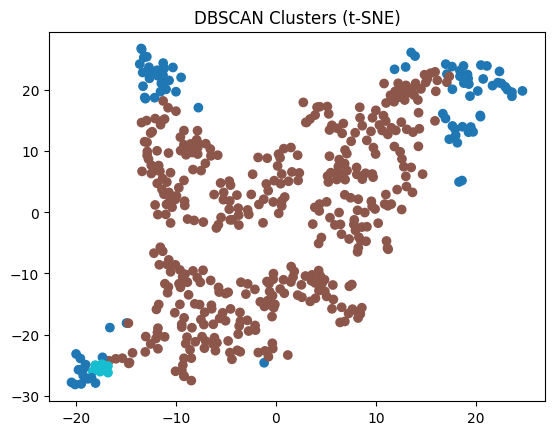

In [74]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df['cluster_2'], cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()


In [75]:
df.groupby('cluster_2')[[
    'total_interactions',
    'post_ratio_engaged_consumers',
    'post_ratio_imp_reach_log',
    'post_ratio_imp_reach_like_log',
    'post_ratio_engaged_consumption_log'
]].mean()


,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
cluster_2,,,,,
-1,566.643678,1.420210,1.163164,1.208276,1.241648
0,137.995025,1.140409,1.010928,1.035674,1.056925
1,26.428571,1.031292,1.032357,1.018925,2.200240


#### Conclusion Of DBSCAN
1. We Should Assign `Cluster -1` (Outlier) As Viral Post Since it had the Highest `Total_interaction` with a huge gap `566.6` and highest `ratio` in both `Engaged_consumers` and `imp_reach`finally `imp_reach_like`
2. `Cluster 1` I would Assign it as `Average or moderate` Ones since it has The Avg value of Each Column
3. While `Cluster 2` Should be Assigned to `Low` or Not-Viral since it has lowest Value but `engaged_consumptions` seems doesn't make such Effection 

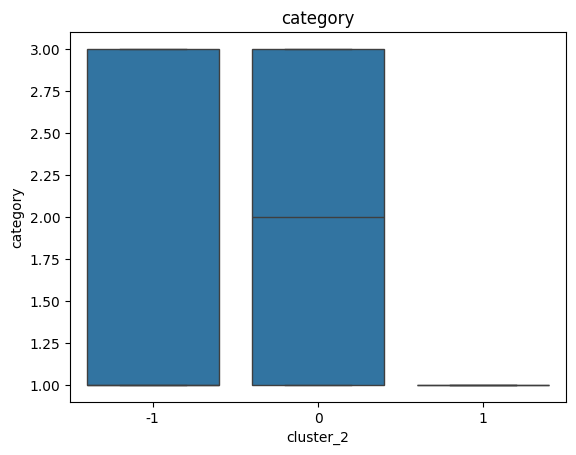

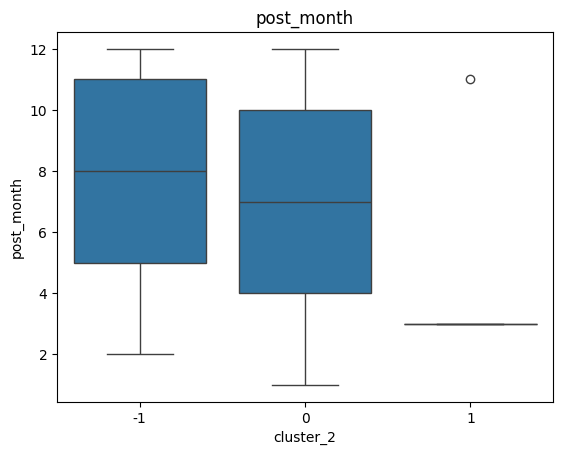

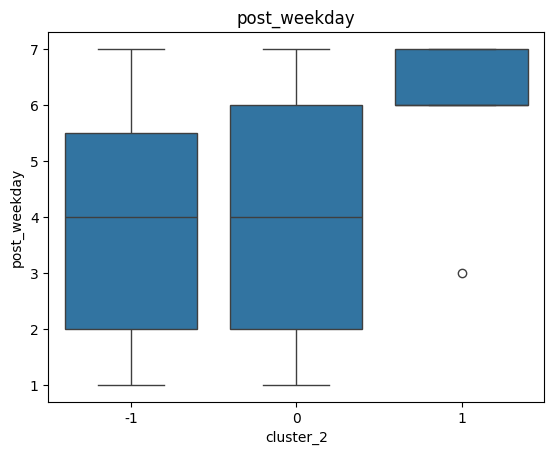

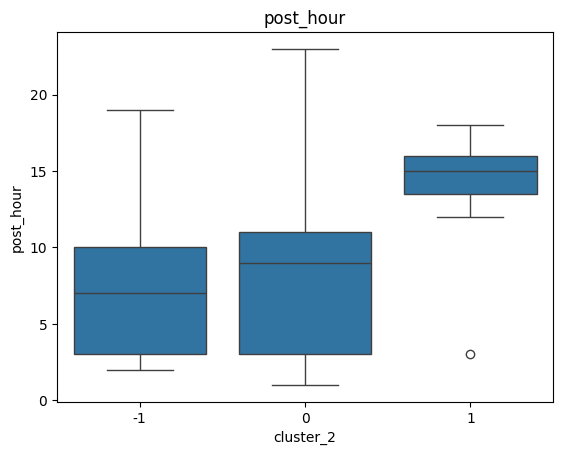

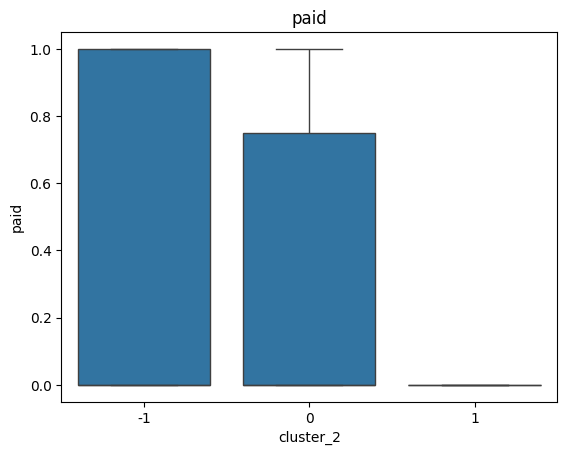

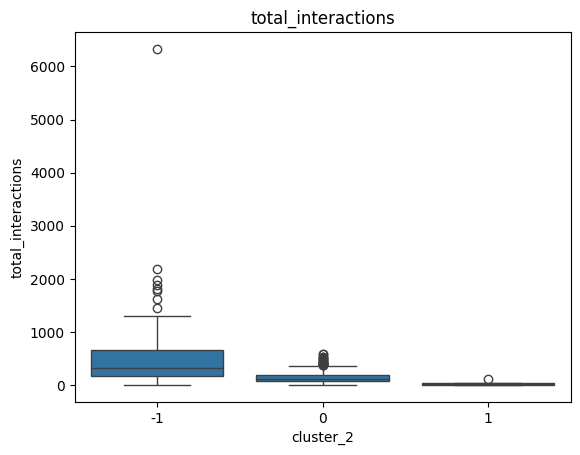

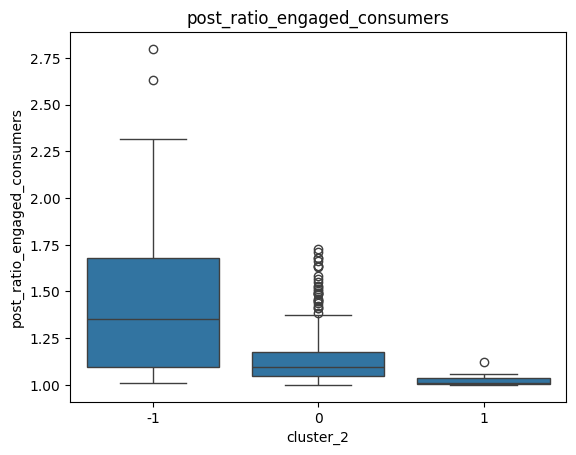

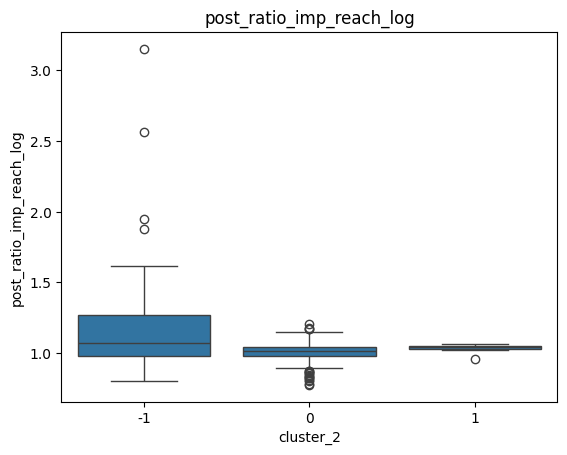

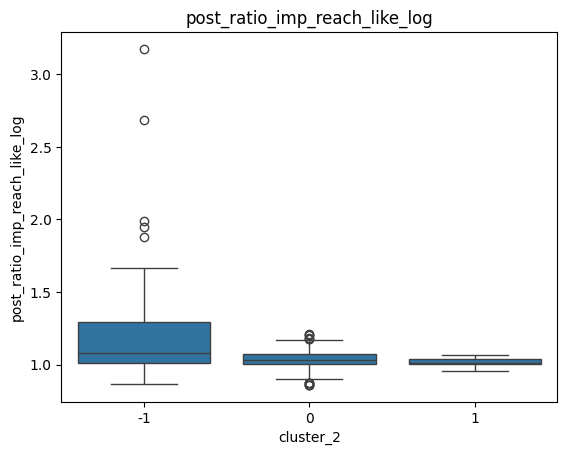

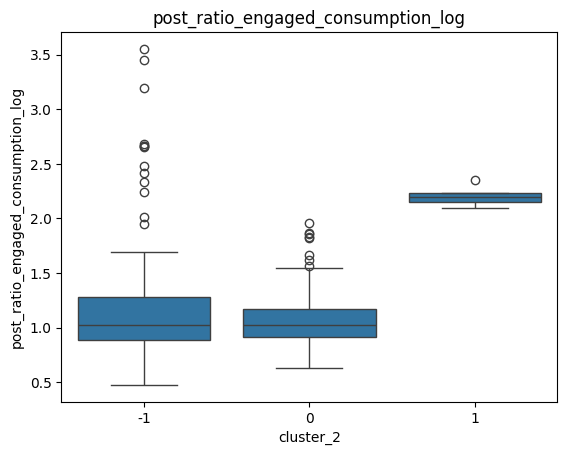

In [77]:
for col in df.columns[1:-2]:  # all scaled features
    sns.boxplot(x='cluster_2', y=col, data=df)
    plt.title(col)
    plt.show()

#### Conclusion Of the Previous Visualization
1. It seems `Category` of `-1 Cluster` Lies Between `All Categories 1, 2, 3` but as we can see that `Cluster 0` has on all of them but median of it lies on `2nd category` so it mostly produce a Medium Viral, Lastly `1 Cluster` that tells us any Category on First Category will lead to Non-Viral Post
2. `post_month` as what we have Visualized on Visualization Process There was a certain month that lead to a High Interaction And the Statistics There matches The Ones here
3. Same Comes for `Weekday` And `Post Hours`
4. `paid` For `-1 Cluster` we see that there's much people who's paying to make there post viral and there's some who's not but we can say that paying has a huge effection on Post `virality` while in other hand `Cluster 0` has lower frequency than `Cluster -1` for paid Posts so it makes since that it has a lower effect on it's post, while lastly `Cluster 1` And all of them Are Not paying for there Posts so it makes since that it has `Not-Viral` Posts
5. "The Impact of Promotion on Clustering Results: Our analysis of the paid feature reveals a clear hierarchy. Cluster -1 (Viral) shows the highest density of paid posts, confirming that financial backing is a primary driver for reaching outlier status. Cluster 0 (Mid-Range) utilizes paid promotion more sparingly, resulting in healthy but non-extreme interaction levels. Finally, Cluster 1 (Non-Viral) consists entirely of unpaid posts, suggesting that without financial amplification, content in this dataset fails to gain significant traction."
6. `Total Interactions` it so Obvious that `Clusters -1` has the Highest `Total Interaction`, while `Cluster 0` has a lower one, and finally `Cluster 1` has the lowest which makes it the `Non-Viral` Posts
7. `Engaged Consumers`, It seems that user who Consume or Engage with post Makes a huge effection on `Viral Posts` and it can be Seen with a huge gap between them
8. `imperesion reach`, Most of the Post who Got Viral or can be seen more Most Likely will be more viral And It could effect the Post same goes for `impression reach like`
9. `Engaged Consumption`, It seems That if user Has clicked multiple Time It could Effect the Post But not that much if he didn't have the Other Factors

##### So At the End Our Clustering And Score (0.44) Make Sense As we Have Visualize it

In [78]:
df['cluster_2'].value_counts()

cluster_2
 0    402
-1     87
 1      7
Name: count, dtype: int64

In [84]:
ch_index = calinski_harabasz_score(X_scaled, df['cluster_2'])

print(f"Silhouette Score: {best_dict['best_score']:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.44
Calinski-Harabasz Index: 50.51


* Metric,Score,What it means for your project
Silhouette Score,0.44,"Indicates that the ""Viral"" posts (-1) are distinct from the ""Normal"" ones (0). You aren't just seeing noise; you're seeing a different behavior pattern."

* CH Index,50.51,"This measures the ratio of ""between-cluster"" vs. ""within-cluster"" variance. For social media data, which is usually messy, 50.51 shows that your 3 clusters are tight and statistically meaningful."